# OLIST E-COMMERCE DATA ANALYSIS PROJECT

In [2]:
import pandas as pd

In [3]:
orders = pd.read_csv("olist_orders_dataset.csv")
order_payments=pd.read_csv("olist_order_payments_dataset.csv")
order_reviews=pd.read_csv("olist_order_reviews_dataset.csv")
order_items=pd.read_csv("olist_order_items_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
pcnt=pd.read_csv("product_category_name_translation.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")

In [4]:
olist_data = orders.copy()
orders["order_id"].duplicated().sum()

0

#### 

why we need to use Aggregation

In [5]:
# Aggregation is needed because some tables have multiple rows per order.
# order_items table
# order_id	product_id	price
# O1	P1	100
# O1	P2	50
# O1	P3	20

In [6]:
# One order (O1) has 3 rows.
# If you merge this raw with orders, O1 will appear 3 times.
# This duplicates orders, inflates metrics like total revenue, total items, etc.
# Wrong EDA and insights.
# Solution:
# We aggregate the data -> summarize all rows of the order into one row per order.
# O1 -> total_items = 3, total_price = 170, total_freight = sum of freight

### Why we don't use all columns

In [7]:
# Why we don’t use all columns
# Many columns in raw tables are item-level, text, or IDs that don’t make sense at order-level:
# product_id -> one order has multiple products -> cannot pick just one
# seller_id -> one order can have multiple sellers -> same issue
# shipping_limit_date -> multiple items -> which one to pick?
# review_comment_message -> text -> cannot summarize meaningfully

# Rule: Only keep columns that can be summarized meaningfully.

#### order_payments

In [8]:
order_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [9]:
order_payments.head(50)

order_id  payment_sequential payment_type   
0   b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card  \
1   a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2   25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3   ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4   42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
5   298fcdf1f73eb413e4d26d01b25bc1cd                   1  credit_card   
6   771ee386b001f06208a7419e4fc1bbd7                   1  credit_card   
7   3d7239c394a212faae122962df514ac7                   1  credit_card   
8   1f78449c87a54faf9e96e88ba1491fa9                   1  credit_card   
9   0573b5e23cbd798006520e1d5b4c6714                   1       boleto   
10  d88e0d5fa41661ce03cf6cf336527646                   1  credit_card   
11  2480f727e869fdeb397244a21b721b67                   1  credit_card   
12  616105c9352a9668c38303ad44e056cd                   1  credit_card   
13  cf95215a722f3ebf29e6bbab87a29e61                   1  credit_card   
14  769214176682788a92801d8907fa1b40                   1  credit_card   
15  12e5cfe0e4716b59afb0e0f4a3bd6570                   1  credit_card   
16  61059985a6fc0ad64e95d9944caacdad                   1  credit_card   
17  79da3f5fe31ad1e454f06f95dc032ad5                   1  credit_card   
18  8ac09207f415d55acff302df7d6a895c                   1  credit_card   
19  b2349a3f20dfbeef62e7b31baa22f84b                   1  credit_card   
20  5a1f6d22f7dfb061ef29216b9af687a1                   1  credit_card   
21  4214cda550ece8ee66441f459dc33a8c                   1  credit_card   
22  adfbf6c2a620196f9a3ec747491c72b7                   1  credit_card   
23  4d680edbaa7d3d9bed69532957368a03                   1  credit_card   
24  8cd68144cdb62dc0d60848cf8616d2a4                   1       boleto   
25  5cfd514482e22bc992e7693f0e3e8df7                   2      voucher   
26  d0a945f85ba1074b60aac97ade7e240e                   1  credit_card   
27  c39414c195d0f94c9d9c35e7c6ed4f1a                   1  credit_card   
28  5d9c5817e278892b7498d90bfa28ade8                   1  credit_card   
29  b69b9260e79a0da00e15f48de1bd2524                   1       boleto   
30  f45074ae38f2e01d9b854ec8d40362ff                   1  credit_card   
31  81cedc4d2132eb6f512354166e51b187                   1  credit_card   
32  595f598849d89203c28d05d0fbf3f92e                   1  credit_card   
33  f9d0ec2fa088ac583e1ccd15b6686073                   1  credit_card   
34  e647bf617de735448a4ba54f8910393c                   1  credit_card   
35  b2bb080b6bc860118a246fd9b6fad6da                   1  credit_card   
36  23f10f509600c30cf2852f9dbdf28fc3                   1  credit_card   
37  f86f6472fa9f395d8d9a6751ca118afb                   1  credit_card   
38  1dcf0c8cd36ffaf57784fbdc90079310                   1  credit_card   
39  00d8d65b666158b633f96054d31af43b                   1       boleto   
40  cf30fe76d1505192acee1c6dccb15545                   1  credit_card   
41  d3e774a185c0b1b2286ffd6c70abe2e6                   1  credit_card   
42  32b1d8f3789a57f1f752e20ac7404b4c                   1       boleto   
43  c10d412026c4077b8e83acf0fea04eee                   1  credit_card   
44  56c3277583e16009c925fdf116df420f                   1       boleto   
45  0e0441786430b7cfcd0d91f822ea4c99                   1  credit_card   
46  6ffb3f1686bceae3466facf7e02ce3fb                   1  credit_card   
47  afef48d3c8a0b1b7c9b7f8f922fb5674                   1  credit_card   
48  c0db7d31ace61fc360a3eaa34dd3457c                   1  credit_card   
49  d574338f566ca28dd67820f48ec1f1d8                   1  credit_card   

    payment_installments  payment_value  
0                      8          99.33  
1                      1          24.39  
2                      1          65.71  
3                      8         107.78  
4                      2         128.45  
5                      2          96.12  
6         

In [10]:
order_payments["order_id"].value_counts()

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: count, Length: 99440, dtype: int64

In [11]:
##How do I represent ALL these 29 rows as ONE meaningful order-level record?
##By using Aggregation

In [12]:
payments_agg = order_payments.groupby("order_id").agg(
    total_payment=("payment_value", "sum"),
    payment_count=("payment_type", "count")
).reset_index()


In [13]:
payments_agg.head()
payments_agg.shape

(99440, 3)

In [14]:
order_payments.shape

(103886, 5)

In [15]:
payments_agg["order_id"].is_unique

True

In [16]:
### MERGE payment_agg with olist dataset

In [17]:
olist_data = olist_data.merge(payments_agg,on = "order_id" ,how="left")

In [18]:
olist_data["order_id"].is_unique

True

In [19]:
len(olist_data) == len(orders)

True

In [20]:
olist_data.head()

order_id                       customer_id   
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d  \
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at   
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15  \
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date   
0          2017-10-04 19:55:00           2017-10-10 21:25:13  \
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  total_payment  payment_count  
0           2017-10-18 00:00:00          38.71            3.0  
1           2018-08-13 00:00:00         141.46            1.0  
2           2018-09-04 00:00:00         179.12            1.0  
3           2017-12-15 00:00:00          72.20            1.0  
4           2018-02-26 00:00:00          28.62            1.0

#### order_items --> this is item-level data, not order-level.

In [21]:
order_items.head()

order_id  order_item_id   
0  00010242fe8c5a6d1ba2dd792cb16214              1  \
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id   
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202  \
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [22]:
## why we need to Aggregate

In [23]:
order_items["order_id"].value_counts()

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: count, Length: 98666, dtype: int64

In [24]:
###Aggregate order_items to order level

In [25]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

<!-- When we aggregate, we must decide:
What information is meaningful at the target level that is *order level*
so,here
1)order_id->Used for grouping
2)order_item_id->We don’t care about which item is item #1 or #2 . We care about how many items total
So we do:count(order_item_id) → total_items
3)price->In order_items,Each row has price of one product.and At order level:
We care about total order value, not individual prices
So we do: sum(price) -> total_price
4)freight_value->Each item has shipping cost.
At order level:
Customer pays total shipping cost
So:
sum(freight_value) -> total_freight
5)product_id ->This is item-level identity.
if needed, we would do:
nunique(product_id) ->unique_products
6)seller_id->We don’t track individual sellers
We track how many sellers were involved   
If needed:we can do nunique(seller_id) → seller_count    
7)shipping_limit_date->This is a logistics deadline, not a numeric value.
At order level:
Multiple items -> multiple shipping dates
Which one do you keep? earliest? latest? average?
That decision is advanced and often skipped in basic EDA.
So we ignore it on purpose. -->

In [26]:
# So why only these three?
# total_items
# total_price
# total_freight
# Because they answer core business questions:
# How big was the order?
# How much money did it generate?
# How much shipping was involved?

In [27]:
items_agg = order_items.groupby("order_id").agg(
    total_items =("order_item_id","count"),
    total_price = ("price", "sum"),
    total_freight=("freight_value", "sum"),
    unique_product=("product_id", "nunique"),
    seller_count =("seller_id", "nunique")).reset_index();

In [28]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [29]:
# ### unique_product=("product_id", "nunique"),
# At order level, we cannot keep product_id itself.
# Why?
# Because one order can have multiple products.
# So instead of which products, we ask:
# How many different products were in this order?

In [30]:
items_agg.shape

(98666, 6)

In [31]:
olist_data = olist_data.merge(items_agg,on="order_id",how="left")

### order_reviews

In [32]:
# Right now order_reviews is NOT at order level.
# If you merge it as-is, we will duplicate orders and destroy our dataset.

In [33]:
order_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [34]:
# From order_reviews, these columns matter:
# review_score -> numeric -> can aggregate
# review_comment_message -> text -> drop (EDA poison)
# dates -> optional

In [35]:
reviews_agg=order_reviews.groupby("order_id").agg(
    review_score =("review_score","mean"),
    review_count =("review_score","count")
).reset_index()

In [36]:
reviews_agg["order_id"].is_unique

True

Merge with olist_data

In [37]:
olist_data = olist_data.merge(reviews_agg,on="order_id",how="left")

In [38]:
len(olist_data)
olist_data["order_id"].is_unique

True

### Merge customers

In [39]:
# customers is already at customer level
# Each customer_id appears once

In [40]:
customers["customer_id"].is_unique

True

In [41]:
olist_data = olist_data.merge(customers,on = "customer_id", how = "left")

In [42]:
###why we did not merge all 8 files with main dataset?

In [43]:
# Ans->I created an order-level fact table.
# Item-level and seller-level tables were aggregated or analyzed separately to preserve data grain and avoid duplication.

### Final checks

In [44]:
olist_data["order_id"].is_unique

True

In [45]:
len(olist_data)

99441

In [46]:
olist_data.isnull().mean().sort_values(ascending=False).head(10)

order_delivered_customer_date    0.029817
order_delivered_carrier_date     0.017930
total_items                      0.007794
total_price                      0.007794
total_freight                    0.007794
unique_product                   0.007794
seller_count                     0.007794
order_approved_at                0.001609
total_payment                    0.000010
payment_count                    0.000010
dtype: float64

In [47]:
olist_data.to_csv("olist_order_level_data.csv",index=False)

In [48]:
olist_data[~olist_data["order_id"].isin(payments_agg["order_id"])]

order_id                       customer_id   
30710  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574  \

      order_status order_purchase_timestamp    order_approved_at   
30710    delivered      2016-09-15 12:16:38  2016-09-15 12:16:38  \

      order_delivered_carrier_date order_delivered_customer_date   
30710          2016-11-07 17:11:53           2016-11-09 07:47:38  \

      order_estimated_delivery_date  total_payment  payment_count  ...   
30710           2016-10-04 00:00:00            NaN            NaN  ...  \

       total_price  total_freight  unique_product  seller_count  review_score   
30710       134.97           8.49             1.0           1.0           1.0  \

       review_count                customer_unique_id   
30710             1  830d5b7aaa3b6f1e9ad63703bec97d23  \

      customer_zip_code_prefix         customer_city customer_state  
30710                    14600  sao joaquim da barra             SP  

[1 rows x 21 columns]

In [49]:
olist_data["has_payment"] = olist_data["total_payment"].notna().astype(int)
olist_data

order_id                       customer_id   
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d  \
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at   
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15  \
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date   
0              2017-10-04 19:55:00           2017-10-10 21:25:13  \
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  total_payment  payment_count  ...   
0               2017-10-18 00:00:00          38.71            3.0  ...  \
1               2018-08-13 00:00:00         141.46            1.0  ...   
2               2018-09-04 00:00:00         179.12            1.0  ...   
3               2017-12-15 00:00:00          72.20            1.0  ...   
4               2018-02-26 00:00:00          28.62            1.0  ...   
...                             ...            ...            ...  ...   
99436           2017-03-28 00:00:00          85.08            1.0  ...   
99437           2018-03-02 00:00:00         195.00            1.0  ...   
99438           2017-09-27 00:00:00         271.01            1.0  ...   
99439           2018-02-15 00:00:00         441.16            1.0  ...   
99440           2018-04-03 00:00:00          86.86            1.0  ...   

       total_freight  unique_product  seller_count  review_score   
0               8.72             1.0           1.0           4.0  \
1              22.76             1.0           1.0           4.0   
2              19.22             1.0           1.0           5.0   
3              27.20             1.0           1.0           5.0   
4               8.72             1.0           1.0           5.0   
...              ...             ...           ...           ...   
99436          13.08             1.0           1.0           5.0   
99437          20.10             1.0   

In [50]:
olist_data["has_review"] = olist_data["review_score"].notna().astype(int)

In [51]:
olist_data

order_id                       customer_id   
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d  \
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at   
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15  \
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date   
0              2017-10-04 19:55:00           2017-10-10 21:25:13  \
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  total_payment  payment_count  ...   
0               2017-10-18 00:00:00          38.71            3.0  ...  \
1               2018-08-13 00:00:00         141.46            1.0  ...   
2               2018-09-04 00:00:00         179.12            1.0  ...   
3               2017-12-15 00:00:00          72.20            1.0  ...   
4               2018-02-26 00:00:00          28.62            1.0  ...   
...                             ...            ...            ...  ...   
99436           2017-03-28 00:00:00          85.08            1.0  ...   
99437           2018-03-02 00:00:00         195.00            1.0  ...   
99438           2017-09-27 00:00:00         271.01            1.0  ...   
99439           2018-02-15 00:00:00         441.16            1.0  ...   
99440           2018-04-03 00:00:00          86.86            1.0  ...   

       unique_product  seller_count  review_score  review_count   
0                 1.0           1.0           4.0             1  \
1                 1.0           1.0           4.0             1   
2                 1.0           1.0           5.0             1   
3                 1.0           1.0           5.0             1   
4                 1.0           1.0           5.0             1   
...               ...           ...           ...           ...   
99436             1.0           1.0           5.0             1   
99437             1.0           1.0           4

In [52]:
olist_data["review_count"] = olist_data["review_count"].fillna(0)

In [53]:
olist_data

order_id                       customer_id   
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d  \
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at   
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15  \
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date   
0              2017-10-04 19:55:00           2017-10-10 21:25:13  \
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  total_payment  payment_count  ...   
0               2017-10-18 00:00:00          38.71            3.0  ...  \
1               2018-08-13 00:00:00         141.46            1.0  ...   
2               2018-09-04 00:00:00         179.12            1.0  ...   
3               2017-12-15 00:00:00          72.20            1.0  ...   
4               2018-02-26 00:00:00          28.62            1.0  ...   
...                             ...            ...            ...  ...   
99436           2017-03-28 00:00:00          85.08            1.0  ...   
99437           2018-03-02 00:00:00         195.00            1.0  ...   
99438           2017-09-27 00:00:00         271.01            1.0  ...   
99439           2018-02-15 00:00:00         441.16            1.0  ...   
99440           2018-04-03 00:00:00          86.86            1.0  ...   

       unique_product  seller_count  review_score  review_count   
0                 1.0           1.0           4.0             1  \
1                 1.0           1.0           4.0             1   
2                 1.0           1.0           5.0             1   
3                 1.0           1.0           5.0             1   
4                 1.0           1.0           5.0             1   
...               ...           ...           ...           ...   
99436             1.0           1.0           5.0             1   
99437             1.0           1.0           4

# Data_Understanding

#### STEP 1: View sample data

In [54]:
##Displaying the first few rows helps in understanding the structure,
##column names, and general nature of the data.

In [55]:
olist_data.head()

order_id                       customer_id   
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d  \
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at   
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15  \
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date   
0          2017-10-04 19:55:00           2017-10-10 21:25:13  \
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  total_payment  payment_count  ...   
0           2017-10-18 00:00:00          38.71            3.0  ...  \
1           2018-08-13 00:00:00         141.46            1.0  ...   
2           2018-09-04 00:00:00         179.12            1.0  ...   
3           2017-12-15 00:00:00          72.20            1.0  ...   
4           2018-02-26 00:00:00          28.62            1.0  ...   

   unique_product  seller_count  review_score  review_count   
0             1.0           1.0           4.0             1  \
1             1.0           1.0           4.0             1   
2             1.0           1.0           5.0             1   
3             1.0           1.0           5.0             1   
4             1.0           1.0           5.0             1   

                 customer_unique_id  customer_zip_code_prefix   
0  7c396fd4830fd04220f754e42b4e5bff                      3149  \
1  af07308b275d755c9edb36a90c618231                     47813   
2  3a653a41f6f9fc3d2a113cf8398680e8                     75265   
3  7c142cf63193a1473d2e66489a9ae977                     59296   
4  72632f0f9dd73dfee390c9b22eb56dd6                      9195   

             customer_city customer_state  has_payment has_review  
0                sao paulo             SP            1          1  
1                barreiras             BA            1          1  
2               vianopolis             GO            1          1  
3  sao goncalo do amarante             RN            1          1  
4              santo andre             SP            1          1  

[5 rows x 23 columns]

#### STEP 2: Dataset shape

In [56]:
# The dataset contains 99441 rows and 21 columns, where each row represents one order and 
# each column represents an attribute related to orders, payments, items, customers, 
# or delivery.

In [57]:
olist_data.shape

(99441, 23)

#### STEP 3: Check structure & data types

In [58]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   total_payment                  99440 non-null  float64
 9   payment_count                  99440 non-null  float64
 10  total_items                    98666 non-null  float64
 11  total_price                    98666 non-null  float64
 12  total_freight                  98666 non-null 

#### 4. Find missing values

In [59]:
olist_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
total_payment                       1
payment_count                       1
total_items                       775
total_price                       775
total_freight                     775
unique_product                    775
seller_count                      775
review_score                        0
review_count                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
has_payment                         0
has_review                          0
dtype: int64

In [60]:
# Missing values are observed in delivery dates, payment information, and item-related 
# fields. These are structural missing values caused by order lifecycle differences such
# as cancellation, non-delivery, or incomplete transactions, rather than data entry
# errors.

#### 5. Understand categories

In [61]:
olist_data["order_status"].value_counts()


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [62]:
olist_data["customer_state"].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

#### STEP 7: Summary statistics

In [63]:
olist_data.describe()

total_payment  payment_count   total_items   total_price   
count   99440.000000   99440.000000  98666.000000  98666.000000  \
mean      160.990267       1.044710      1.141731    137.754076   
std       221.951257       0.381166      0.538452    210.645145   
min         0.000000       1.000000      1.000000      0.850000   
25%        62.010000       1.000000      1.000000     45.900000   
50%       105.290000       1.000000      1.000000     86.900000   
75%       176.970000       1.000000      1.000000    149.900000   
max     13664.080000      29.000000     21.000000  13440.000000   

       total_freight  unique_product  seller_count  review_score   
count   98666.000000    98666.000000  98666.000000  99441.000000  \
mean       22.823562        1.038098      1.013622      4.071235   
std        21.650909        0.226456      0.122297      1.358410   
min         0.000000        1.000000      1.000000      1.000000   
25%        13.850000        1.000000      1.000000      4.000000   
50%        17.170000        1.000000      1.000000      5.000000   
75%        24.040000        1.000000      1.000000      5.000000   
max      1794.960000        8.000000      5.000000      5.000000   

       review_count  customer_zip_code_prefix   has_payment  has_review  
count  99441.000000              99441.000000  99441.000000     99441.0  
mean       1.005621              35137.474583      0.999990         1.0  
std        0.075302              29797.938996      0.003171         0.0  
min        1.000000               1003.000000      0.000000         1.0  
25%        1.000000              11347.000000      1.000000         1.0  
50%        1.000000              24416.000000      1.000000         1.0  
75%        1.000000              58900.000000      1.000000         1.0  
max        3.000000              99990.000000      1.000000         1.0

# Data Handling

### Part 1: Data Type Handling

#### step 1: Convert date columns

In [64]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   total_payment                  99440 non-null  float64
 9   payment_count                  99440 non-null  float64
 10  total_items                    98666 non-null  float64
 11  total_price                    98666 non-null  float64
 12  total_freight                  98666 non-null 

In [65]:
# order_purchase_timestamp       object
# order_approved_at              object
# order_delivered_carrier_date   object
# order_delivered_customer_date  object
# order_estimated_delivery_date  object
# These are DATES, but pandas thinks they are strings (object)

In [66]:
date_cols = ["order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
           ]
for col in date_cols:
    olist_data[col] = pd.to_datetime(olist_data[col],errors = "coerce")

In [67]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   total_payment                  99440 non-null  float64       
 9   payment_count                  99440 non-null  float64       
 10  total_items                    98666 non-null  float64       
 11  total_price    

In [68]:
# Before handling missing values, data types were corrected to ensure accurate 
# interpretation and processing. Date-related columns were converted from object to 
# datetime format,allowing proper identification of missing timestamps and enabling
# time-based analysis.

## PHASE 2: Data Cleaning & Preparation

In [69]:
olist_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
total_payment                       1
payment_count                       1
total_items                       775
total_price                       775
total_freight                     775
unique_product                    775
seller_count                      775
review_score                        0
review_count                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
has_payment                         0
has_review                          0
dtype: int64

In [70]:
olist_data[["total_items",
    "total_price",
    "total_freight",
    "seller_count",
    "unique_product"
           ]] = olist_data[["total_items",
    "total_price",
    "total_freight",
    "seller_count",
    "unique_product"]].fillna(0)

In [71]:
olist_data.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
total_payment                       1
payment_count                       1
total_items                         0
total_price                         0
total_freight                       0
unique_product                      0
seller_count                        0
review_score                        0
review_count                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
has_payment                         0
has_review                          0
dtype: int64

In [72]:
##There is 2 missing values in total_payment,payment_count, so we can drop it or fill it with 0
olist_data[["total_payment","payment_count"]]=olist_data[["total_payment","payment_count"]].fillna(0)                    


In [73]:
# Mean or mode imputation was not used because the missing values represent zero-quantity 
# transactions rather than unknown values. Zero imputation preserves the correct business 
# interpretation for exploratory analysis.

In [74]:
# order_approved_at	160	Orders never approved (maybe canceled, payment failed)
# order_delivered_carrier_date	1,783	Order never shipped by seller / carrier delays / canceled
# order_delivered_customer_date	2,965	Order never reached customer / canceled / lost / returned

In [75]:
# These missing values are not errors. They reflect real business states.

In [76]:
#### So we create flag

In [77]:
# 1 → approved/delivered
# 0 → not approved/not delivered

In [78]:
olist_data["is_approved"] = olist_data["order_approved_at"].notna().astype(int)
olist_data["is_delivered"] = olist_data["order_delivered_customer_date"].notna().astype(int)

In [79]:
#1 → order shipped
#0 → order not shipped
olist_data["is_shipped"] = olist_data["order_delivered_carrier_date"].notna().astype(int)


#### orders that were actually shipped:

In [80]:
shipped_orders = olist_data[olist_data["is_shipped"]==1].copy()

In [81]:
shipped_orders["shipping_days"] = (
    shipped_orders["order_estimated_delivery_date"] - shipped_orders["order_purchase_timestamp"]
).dt.days


In [82]:
shipped_orders["shipping_days"].describe()

count    97658.000000
mean        23.390741
std          8.770281
min          2.000000
25%         18.000000
50%         23.000000
75%         28.000000
max        155.000000
Name: shipping_days, dtype: float64

## Visualization

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [84]:
df = olist_data

### 1. Univariate Analysis

#### 1.1 Orders per Status

###### What & Why: Check the distribution of orders across different statuses to understand order fulfillment.

C:\Users\Purus\AppData\Local\Temp\ipykernel_29352\3581101560.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders, x='order_status', palette='viridis')


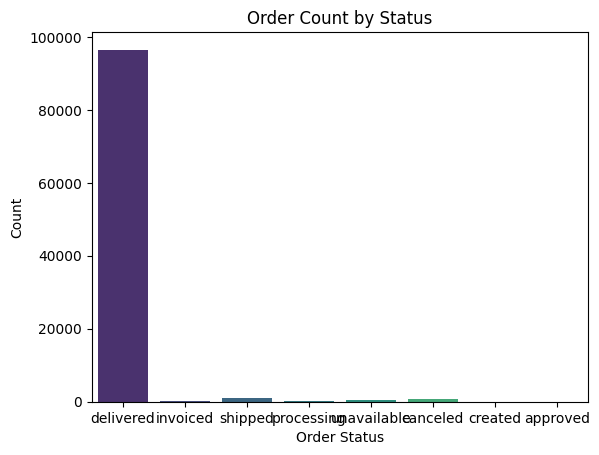

In [90]:
sns.countplot(data=orders, x='order_status', palette='viridis')
plt.title("Order Count by Status")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.show()

##### Insights: Most orders are delivered. Very few are canceled or unavailable, indicating good order completion.

#### 1.2 Payment Types

###### What & Why: Understand the preferred payment method of customers.

C:\Users\Purus\AppData\Local\Temp\ipykernel_29352\685246316.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_payments, x='payment_type', palette='coolwarm')


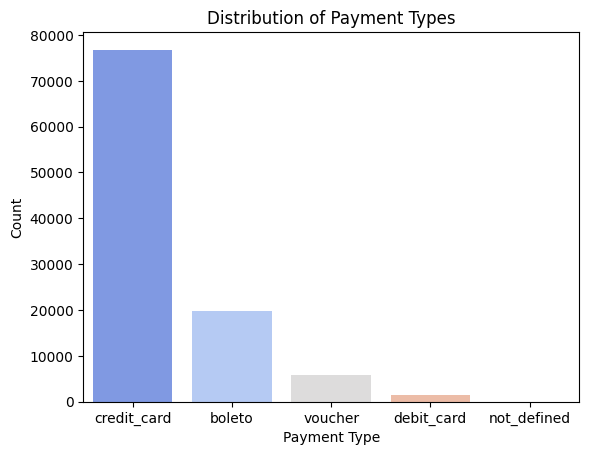

In [91]:
sns.countplot(data=order_payments, x='payment_type', palette='coolwarm')
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

##### Insights: Credit card and boleto are most used; digital payments are less popular.

#### 1.3 Order Values Distribution

###### What & Why: Analyze the spread of order prices to detect trends or outliers.

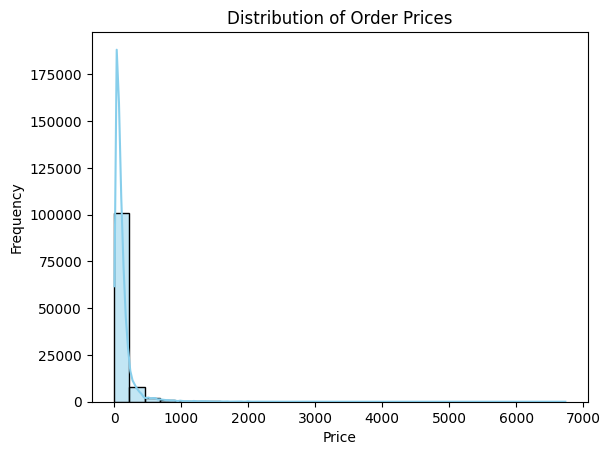

In [97]:
sns.histplot(order_items['price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Order Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

###### Insights: Most orders are priced under 500 BRL; few high-value orders indicate skewed distribution.

### 2. Bivariate Analysis

#### 2.1 Price vs Freight Value

###### What & Why: Explore if expensive orders cost more for shipping.

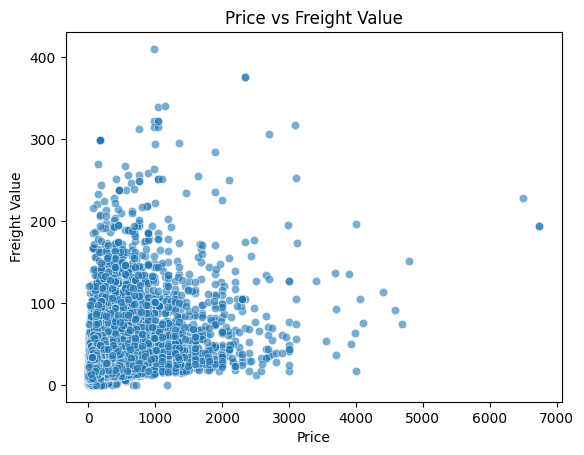

In [98]:
sns.scatterplot(x='price', y='freight_value', data=order_items, alpha=0.6)
plt.title("Price vs Freight Value")
plt.xlabel("Price")
plt.ylabel("Freight Value")
plt.show()

###### Insights: Positive correlation exists, but some low-priced items have high freight (likely bulky items).

#### 2.2 Order Status vs Price

###### What & Why: See if order price affects delivery success.

C:\Users\Purus\AppData\Local\Temp\ipykernel_29352\2373550860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='order_status', y='price', data=order_data, palette='Set2')


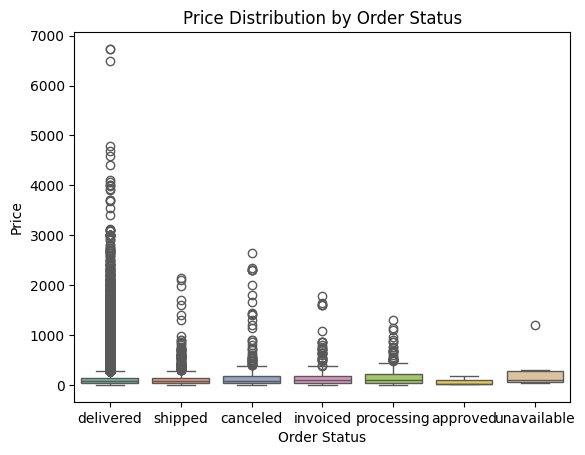

In [100]:
# Merge order_items with orders to get order_status
order_data = order_items.merge(orders[['order_id', 'order_status']], on='order_id', how='left')

sns.boxplot(x='order_status', y='price', data=order_data, palette='Set2')
plt.title("Price Distribution by Order Status")
plt.xlabel("Order Status")
plt.ylabel("Price")
plt.show()


###### Insights: Delivered orders have varied prices; canceled orders are mostly lower-priced.

#### 2.3 Payment Type vs Payment Value

###### What & Why: Compare average payment values across payment types.

C:\Users\Purus\AppData\Local\Temp\ipykernel_29352\1560777327.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='payment_value', data=order_payments, palette='pastel')


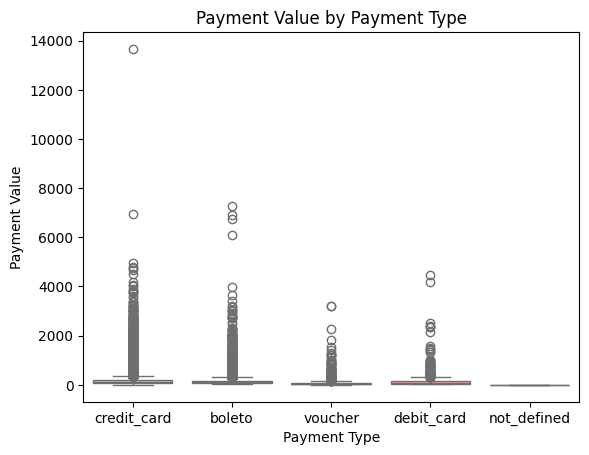

In [101]:
sns.boxplot(x='payment_type', y='payment_value', data=order_payments, palette='pastel')
plt.title("Payment Value by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Payment Value")
plt.show()

###### Insights: Credit card payments show wider price range; voucher payments are low.

### 3. Multivariate Analysis

#### 3.1 Price vs Freight Value by Order Status

###### What & Why: Examine how order price and shipping cost vary by order outcome.

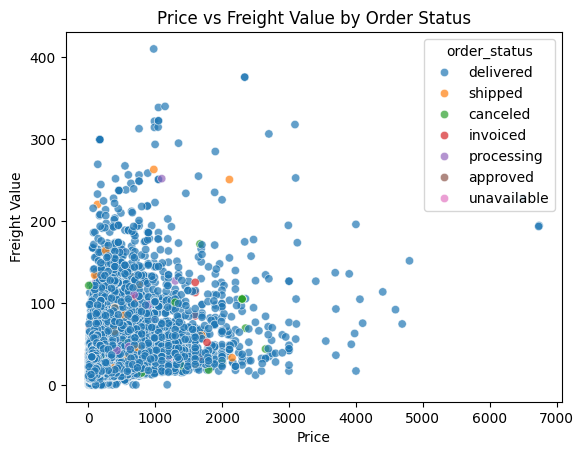

In [104]:
# Merge order_items with orders to get order_status
order_data = order_items.merge(orders[['order_id', 'order_status']], on='order_id', how='left')

sns.scatterplot(
    x='price',
    y='freight_value',
    hue='order_status',
    data=order_data,
    palette='tab10',
    alpha=0.7
)
plt.title("Price vs Freight Value by Order Status")
plt.xlabel("Price")
plt.ylabel("Freight Value")
plt.show()


###### Insights: Delivered orders dominate; canceled/unavailable orders have scattered prices and freight.

#### 3.2 Payment Type vs Payment Value by Status

###### What & Why: Check if payment type affects payment value across orders.

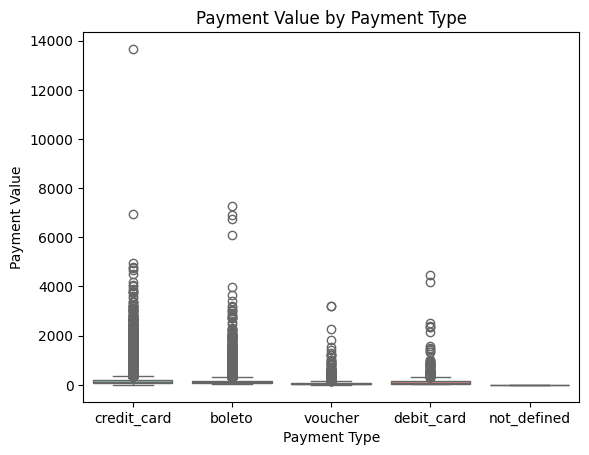

In [105]:
sns.boxplot(x='payment_type', y='payment_value', hue='payment_type', data=order_payments, palette='Set3')
plt.title("Payment Value by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Payment Value")
plt.show()

###### Insights: Higher payments mostly via credit card; smaller payments through voucher or debit.

#### 3.3 Correlation Heatmap

###### What & Why: Identify relationships between numerical variables.

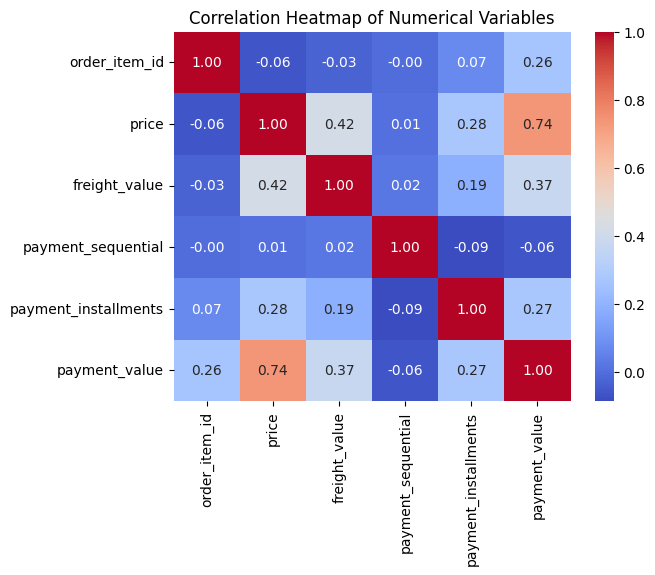

In [108]:
merged_df = order_items.merge(order_payments, on='order_id', how='left')
numeric_cols = merged_df.select_dtypes(include=np.number)

sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


###### Insights: Price and freight are moderately correlated; payment value aligns with order price.

### Final Conclusion

What

The dataset was cleaned and aggregated at the order level, ensuring that each row represents a single order. Based on this processed data, univariate, bivariate, and multivariate visualizations were created to analyze order status, payment behavior, pricing, freight cost, customer satisfaction, and delivery performance.

Why

Aggregating the data at the order level prevents duplication caused by multiple payment or item records per order. This ensures accurate, unbiased, and meaningful analysis, allowing reliable interpretation of patterns and relationships in the e-commerce system.



##### Final Insights

→ Most orders are successfully delivered, indicating efficient operational and logistics performance.

→ Credit card and boleto are the most preferred payment methods, while voucher and debit card payments are used for lower-value transactions.

→ Order price and freight value show a moderate positive relationship, though some low-priced items incur higher freight costs.

→ Delivered orders span a wide price range, while canceled or unavailable orders are generally lower priced.

→ Customer satisfaction is high, as the majority of reviews are rated 4 or 5 stars.

→ The correlation heatmap highlights meaningful relationships among numerical variables, helping identify key drivers of payment value and shipping cost.

### CONCLUSION

The analysis demonstrates that the Olist e-commerce platform operates efficiently, with strong delivery success, high customer satisfaction, and effective payment handling. Performing univariate, bivariate, and multivariate analysis on aggregated order-level data ensures accurate insights and reveals important relationships between pricing, freight costs, payment behavior, and order outcomes.